# Malaria Detection using Cell Images
The dataset contains 2 folders:

1.Parasitized-class 0

2.Uninfected-class 1

And a total of 27,558 images.

In [3]:
import os

In [1]:
#directory of the dataset-cell images
data_dir = '/Users/Sanjana/Downloads/Malaria detection using cell images/cell_images'

In [4]:
#list the folders in the dataset
os.listdir(data_dir)

['test', 'train']

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#imread reads the real image as pixels
from matplotlib.image import imread

In [7]:
#define the path to test and train directories
test_path = data_dir + '/test/'
train_path = data_dir + '/train/'

In [8]:
test_path

'/Users/Sanjana/Downloads/Malaria detection using cell images/cell_images/test/'

In [9]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [10]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [11]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [12]:
para_cell = train_path+'parasitized/'+ 'C119P80ThinF_IMG_20151002_123608_cell_141.png'

In [13]:
para_cell

'/Users/Sanjana/Downloads/Malaria detection using cell images/cell_images/train/parasitized/C119P80ThinF_IMG_20151002_123608_cell_141.png'

In [14]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

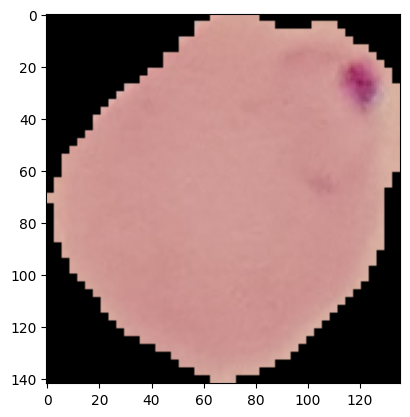

In [15]:
plt.imshow(imread(para_cell))

In [16]:
os.listdir(train_path+'uninfected')[5]

'C100P61ThinF_IMG_20150918_144104_cell_48.png'

In [17]:
uninfected_cell = train_path + 'uninfected/'+ 'C234ThinF_IMG_20151112_162843_cell_168.png'

In [18]:
uninfected_cell

'/Users/Sanjana/Downloads/Malaria detection using cell images/cell_images/train/uninfected/C234ThinF_IMG_20151112_162843_cell_168.png'

In [19]:
uninfected_cell = imread(uninfected_cell)

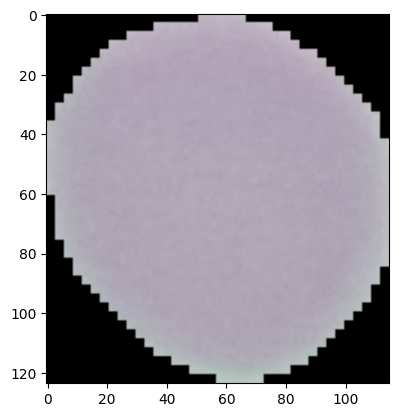

In [20]:
plt.imshow(uninfected_cell)

In [21]:
len(os.listdir(train_path+'parasitized'))

12480

In [22]:
len(os.listdir(train_path+'uninfected'))

12480

In [23]:
len(os.listdir(test_path+'parasitized'))

1300

In [24]:
len(os.listdir(test_path+'uninfected'))

1300

In [26]:
# THIS IS REAL IMAGE, ALL IMAGES DO NO HAVE SAME
# DIMESIONS

In [25]:
#the dim1 and dim2 lists will contain the height and width dimensions of each image in the directory test_path+'uninfected'
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    
    img = imread(test_path + 'uninfected/' + image_filename)
    #height,width,channel=img.shape
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

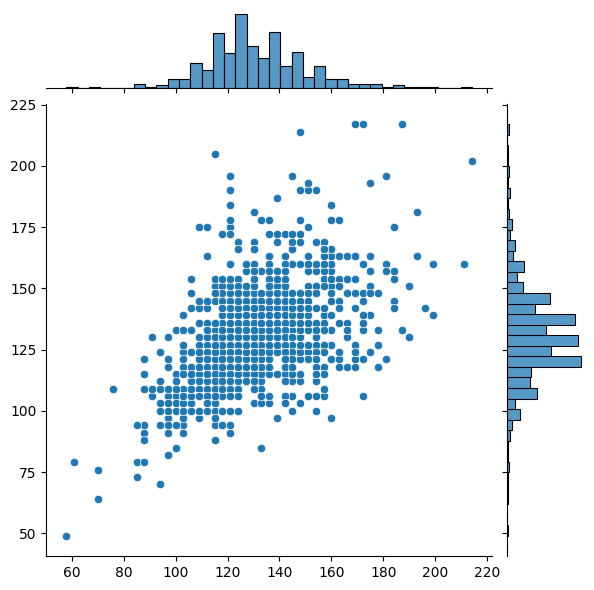

In [26]:
#height and width relationship using jointplot
sns.jointplot(x=dim1,y=dim2)

In [27]:
np.mean(dim1)

130.92538461538462

In [28]:
np.mean(dim2)

130.75

In [29]:
# CNN cannot train in different different image sizes hence we need to reshape themm

In [30]:
image_shape = (130,130,3)

## ImageDataGenerator

Batch Image Data Manupulation

1. Resize the Image
2. Data Augmentation ( Rotation, Scaling )

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator    #used to perform data augmentation

The parameters used in the ImageDataGenerator constructor:

1.rotation_range: It specifies the range (in degrees) for random rotations applied to the images.

2.width_shift_range and height_shift_range: They determine the range for randomly shifting the images horizontally or vertically, respectively.

3.rescale: It rescales the image pixel values by the given factor to normalize them between 0 and 1.

4.shear_range: It sets the range for applying shear transformations(is a type of geometric transformation applied to images. It involves shifting one part of the image along a specific direction while keeping the other part fixed. This transformation causes the image to be skewed or distorted.) to the images.

5.zoom_range: It defines the range for randomly zooming in or out of the images.

6.horizontal_flip: It enables random horizontal flipping of the images.

7.fill_mode: It determines the strategy for filling in any newly created pixels during the transformation process.

In [32]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip = True,
                              fill_mode ='nearest' 
                              )

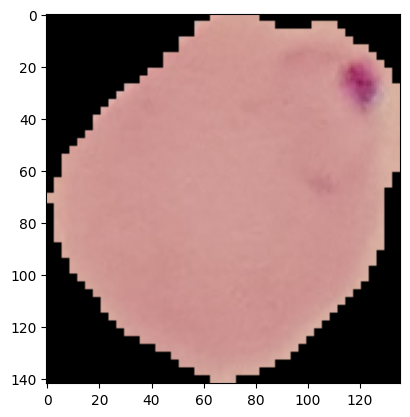

In [33]:
#without image data generator
para_img = imread(para_cell)
plt.imshow(para_img)

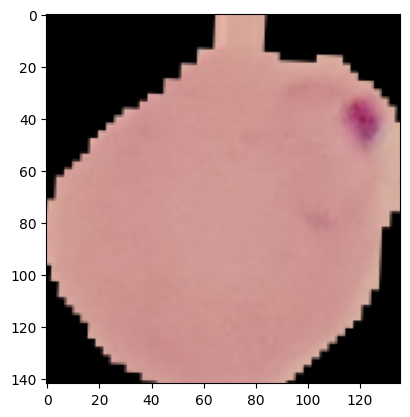

In [34]:
#with image datagenerator-applying random transformation
plt.imshow(image_gen.random_transform(para_img))

In [24]:
#1.flow from directory takes in the main folder as input(here train_path)
#2.it consists of two subfolders i.e parasitized and uninfected
#3.flow_from _directory automatically assigns labels to the images based on the subfolder they belong to.
#4.It will resize the images and then create batches of the images based on their classes

In [35]:
#automatically read images from the directory specified by train_path and generate batches of augmented image data.
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


## Creating the Model 

In [41]:
from tensorflow.keras.models import Sequential

In [42]:
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Dropout,Flatten

In [43]:
#create a skeleton of the network
model = Sequential()
#add conv2d layer with 32 filters
model.add(Conv2D(filters=32, 
                 kernel_size=(3,3), 
                 input_shape=image_shape,
                 activation='relu'
                ))
#reduce the spatial dimension using maxpooling of pool size 2x2
model.add(MaxPool2D(pool_size=(2,2)))

#add conv2d and maxpooling layer with different filter value inorder to increase the complexity and depth of model
model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 input_shape=image_shape,
                 activation='relu'
                ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 input_shape=image_shape,
                 activation='relu'
                ))
model.add(MaxPool2D(pool_size=(2,2)))
# convert the multidimensional feature maps into a 1-dimensional vector, preparing them for the fully connected layers.
model.add(Flatten())
#add fully connected layer using Dense
model.add(Dense(128, activation='relu'))
#randomly sets a fraction of input units to zero during training to prevent overfitting.
model.add(Dropout(0.5))
#output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
#It allows you to monitor a specific metric (in this case, 'val_loss', which typically refers to the validation loss) 
#and stop the training process early if the metric does not improve within a certain number of epochs defined by 
#the patience parameter.
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [47]:
batch_size= 16

In [48]:
#allows you to generate batches of augmented images and their corresponding labels directly from a directory structure.
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],  #[:2] selects the width and height dimensions
                                                color_mode = 'rgb',
                                                batch_size=batch_size,   #number of images and labels to be included in each batch
                                                class_mode='binary'
                                               )

Found 24958 images belonging to 2 classes.


In [49]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                                color_mode = 'rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                               shuffle= False
                                               )

Found 2600 images belonging to 2 classes.


In [ ]:
#results = model.fit_generator(train_image_gen, epochs=20,
#                             validation_data = test_image_gen,
#                             callbacks = [early_stop])

In [ ]:
#model.save('malaria_model.h5')

In [50]:
from tensorflow.keras.models import load_model

In [51]:
model = load_model('malaria_model.h5')

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [53]:
pred= model.predict(test_image_gen)

163/163 [==============================] - 54s 328ms/step


In [54]:
pred

array([[5.3696357e-07],
       [2.3610753e-05],
       [9.8446989e-04],
       ...,
       [9.8409146e-01],
       [9.3453157e-01],
       [7.9429340e-01]], dtype=float32)

In [55]:
predictions = pred > 0.7

In [56]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [57]:
len(pred)

2600

In [59]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [60]:
accuracy_score(test_image_gen.classes,predictions)

0.9223076923076923

In [61]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [62]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.90      0.96      0.92      1300
           1       0.95      0.89      0.92      1300

    accuracy                           0.92      2600
   macro avg       0.92      0.92      0.92      2600
weighted avg       0.92      0.92      0.92      2600



In [59]:
#becareful -> if you want to input new image you have to shape it to
# (1,130,130,3)

In [63]:
from PIL import Image

In [64]:
image = Image.open('/Users/Sanjana/OneDrive/Desktop/uninfected.png')

# Resize image to target size
image = image.resize((130, 130))

# Convert PIL image object to a numerical array
image_array = np.array(image)

# Reshape the array to match the expected input shape of the CNN
image_array = image_array.reshape((1, 130, 130, 3))

In [65]:
pred_result= model.predict(image_array)

1/1 [==============================] - 0s 148ms/step


In [66]:
pred_result

array([[1.]], dtype=float32)

In [67]:
predictions = pred_result > 0.7

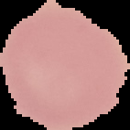

In [68]:
image

In [69]:
predict1d=predictions.flatten()
counts = np.bincount(predict1d)
predicted_class = np.argmax(counts)

In [70]:
predicted_class

1